# Netflix Userbase Analysis

# Introduction

This analysis delves into a comprehensive dataset of Netflix users, examining subscription types, monthly revenue, demographics, and key user characteristics. The dataset, featuring columns like User ID, Join Date, and Country, offers insights into patterns that shape the streaming platform's user landscape. The goal is to unveil key findings through exploratory data analysis, contributing to a nuanced understanding of user preferences and informing decisions for an enhanced Netflix experience.


![Banner](https://thenfapost.com/wp-content/uploads/2021/03/netflix.jpg)

# Data Description

* **User ID:** Unique identifier for each user.
* **Subscription Type:** Type of subscription (e.g., Basic, Standard, Premium).
* **Monthly Revenue:** Revenue generated from the user's subscription per month.
* **Join Date:** Date when the user joined Netflix.
* **Last Payment Date:** Date of the user's last payment.
* **Country:** User's location.
* **Age:** User's age.
* **Gender:** User's gender.
* **Device:** Device used to access Netflix (e.g., Mobile, Tablet, Computer).

In [1]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go


In [2]:
df = pd.read_csv("/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv") #Reading the CSV file
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [4]:
df.duplicated().sum() #Checking whether the dataset have duplicated values

0

In [5]:
df["Plan Duration"].unique()

array(['1 Month'], dtype=object)

In [6]:
df = df.drop("Plan Duration", axis = 1) #Removing Plan Duration attribute as it only have 1 month in all columns

In [7]:
df['Join Date'] = pd.to_datetime(df['Join Date']) #Changing the datatype
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date']) #Changing the datatype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 175.9+ KB


# Data Visualization

# Distribution of Subscription Types

In [9]:
sub_cnts = df['Subscription Type'].value_counts()
px.pie(sub_cnts, names=sub_cnts.index, values=sub_cnts.values, title='Distribution of Subscription Types', color_discrete_sequence=px.colors.sequential.Jet, hole = 0.5)

**Observations**

* The majority of the Netflix userbase, accounting for 40%, has opted for the Basic subscription plan.
* Around 30.7% of users have chosen the Standard plan.
* Following closely behind, The remaining 29.3% have subscribed to the Premium plan.
* Lower-priced plans tend to attract more customers, as the majority of Netflix users have subscribed to the Basic plan, which is the least expensive option.

#  Age Distribution

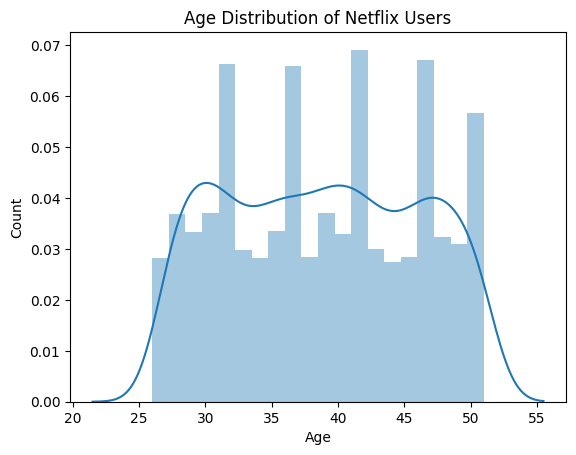

In [10]:
sns.distplot(df['Age'],bins = 20)
plt.title('Age Distribution of Netflix Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

**Observations**

* The minimum age recorded in the dataset is 26 years old.
* 25% of the users in the dataset are 32 years old or younger.
* 75% of the users in the dataset are 45 years old or younger.
* The maximum age recorded in the dataset is 51 years old.

# Country Distribution

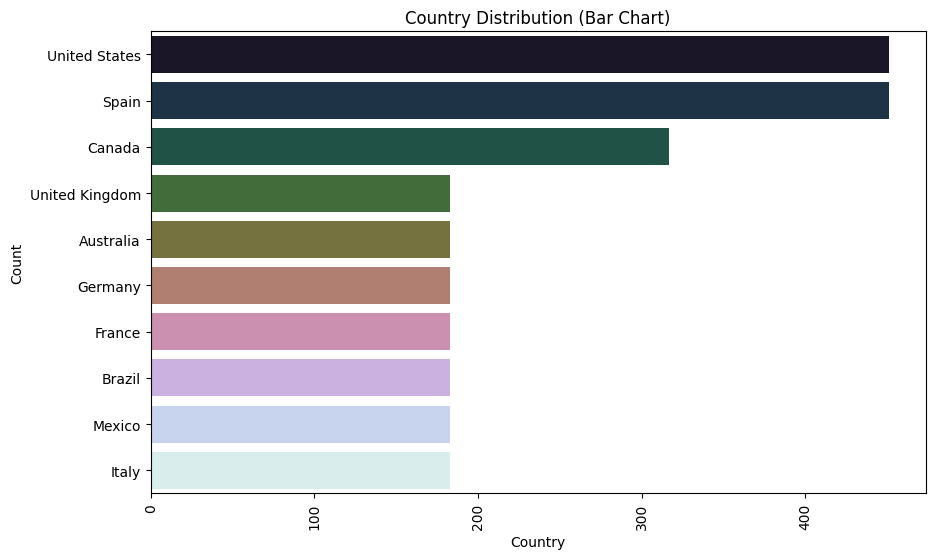

In [11]:
country_counts = df['Country'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(y=country_counts.index, x=country_counts.values, palette= "cubehelix")
plt.title('Country Distribution (Bar Chart)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation="vertical")
plt.show()

**Observations**

According to this dataset

* The United States has the highest number of Netflix users.
* Spain is ranked second in terms of the number of Netflix users.
* Canada is ranked third in terms of the number of Netflix users.

# Gender Distribution

In [12]:
gender_counts = df['Gender'].value_counts()
px.pie(gender_counts, names=gender_counts.index, values=gender_counts.values, title='Gender Distribution', hole=0.5, color_discrete_sequence=px.colors.sequential.Blackbody)

**Observations**

Acording to the dataset, the gender distribution of Netflix users is roughly equal, with slightly more females than males. 

# Device Distribution

In [13]:
device_counts = df['Device'].value_counts()
px.pie(device_counts, names=device_counts.index, values=device_counts.values, title='Device Distribution', color_discrete_sequence=px.colors.sequential.RdBu, hole=0.5)

**Observations**

The usage of different devices to access Netflix is relatively evenly distributed. Around a quarter of users access Netflix using a laptop, tablet, smartphone, or Smart TV respectively. This suggests that Netflix is designed to be easily accessible across different devices and platforms.

# Age Distribution by Subscription Type

In [14]:
px.box(df, x="Subscription Type", y="Age", color="Gender", notched=True, color_discrete_sequence=px.colors.sequential.Rainbow)

**Observations**

**Basic Subscription:**

* For males, the age range (interquartile range) is from 32 to 45.
* For females, the age range (interquartile range) is from 32 to 46.

**Standard Subscription:**

* For males, the age range (interquartile range) is from 33 to 44.75.
* For females, the age range (interquartile range) is from 34 to 45.

**Premium Subscription:**

* For males, the age range (interquartile range) is from 32 to 44.5.
* For females, the age range (interquartile range) is from 32 to 46.

The provided information suggests that the age distribution among users with different subscription types (Basic, Standard, and Premium) varies slightly.For example, for the basic subscription, the age range for females is slightly higher than that for males. 

# Monthly Revenue by Country and Subscription Type

In [15]:
fig = px.sunburst(df, path=["Country", "Subscription Type"], values="Monthly Revenue", title="Sunburst Chart with Text Labels")
fig.update_traces(textinfo="label+value+percent parent")
fig.show()

**Observations**

* United States: Basic - 44%, Standard - 24%, Premium - 32%
* Spain: Basic - 24%, Standard - 28%, Premium - 47%
* Canada: Basic - 46%, Standard - 27%, Premium - 27%
* United Kingdom: Standard - 98%
* Italy: Basic - 96%
* France: Basic - 19%, Premium - 81%
* Brazil: Basic - 80%, Standard - 4%, Premium - 16%
* Australia: Basic - 12%, Standard - 28%, Premium - 55%
* Germany: Basic - 81%, Standard - 12%, Premium - 7%
* Mexico: Standard - 98%

The Basic plan is popular in the United States, Canada, Italy, Brazil, and Germany. The Standard plan is favored in the United Kingdom and Mexico. Meanwhile, the Premium plan is preferred in Spain, France, and Australia.


# Monthly Revenue by Country

In [16]:
px.choropleth(df, locations="Country", locationmode="country names", color="Monthly Revenue", title="Choropleth Map of Monthly Revenue by Country")

**Observations**

* The United States has the highest Monthly Revenue.
* Spain is ranked second in terms of the Monthly Revenue.
* Canada is ranked third in terms of the Monthly Revenue.

# Monthly User Sign-ups and Last Payments

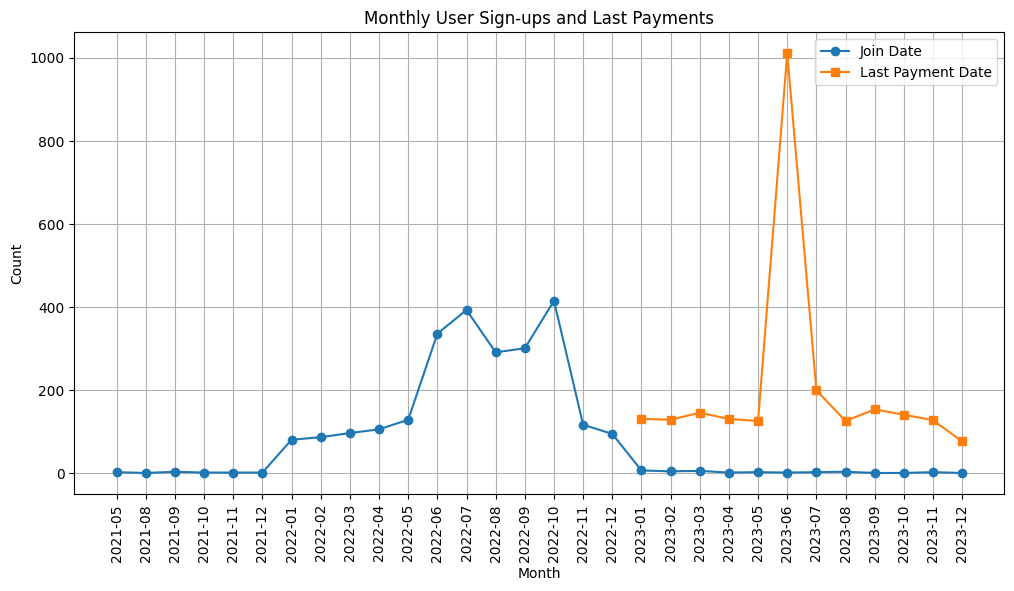

In [17]:
# Extract the year and month as a string for plotting
df['Join Month'] = df['Join Date'].dt.strftime('%Y-%m')
df['Last Payment Month'] = df['Last Payment Date'].dt.strftime('%Y-%m')

monthly_join_counts = df['Join Month'].value_counts().sort_index()
monthly_payment_counts = df['Last Payment Month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_join_counts.index, monthly_join_counts.values, label='Join Date', marker='o')
plt.plot(monthly_payment_counts.index, monthly_payment_counts.values, label='Last Payment Date', marker='s')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly User Sign-ups and Last Payments')
plt.xticks(rotation="vertical") 
plt.legend()
plt.grid(True)
plt.show()

**Observations**

The year 2022 saw a significant increase in the number of signups from May to July, with a continued rise in July. However, there was a slight dip in August and September before reaching its peak in October, after which the number of signups started to decline from November.

Furthermore, the fact that many users' last payment date is in June 2023 suggests that a significant number of users have discontinued their subscription at that time, which can be concerning for Netflix. 

# Conclusions

* The majority of Netflix users (40%) opt for the Basic subscription plan, making it the most popular choice. The Standard plan is selected by about 30.7% of users, and the Premium plan is chosen by approximately 29.3% of users. Lower-priced plans tend to attract more customers.

* The age distribution in the dataset ranges from a minimum of 26 years to a maximum of 51 years. A quarter of the users are 32 years old or younger, while 75% are 45 years old or younger.

* The United States has the highest number of Netflix users, followed by Spain and Canada.

* The gender distribution among Netflix users is nearly balanced, with slightly more females than males.

* Device usage to access Netflix is well-distributed among users, with approximately a quarter of users accessing the service via various devices, including laptops, tablets, smartphones, and Smart TVs.

* The analysis reveals slight variations in age distribution among users with different subscription types. For instance, the interquartile range (IQR) for the age of Basic subscribers varies slightly between males and females.

* The Basic plan is popular in the United States, Canada, Italy, Brazil, and Germany. The Standard plan is favored in the United Kingdom and Mexico. Meanwhile, the Premium plan is preferred in Spain, France, and Australia.

* Examining the trends in user sign-ups shows that there were ups and downs over time. In 2022, there was a big increase in new users, especially in October. However, after November, there was a drop in new sign-ups, possibly because of seasons or reaching a point where most people who want Netflix already have it.Additionally, seeing many people making their last payment in June 2023 suggests that a lot of users may have stopped using Netflix around that time.




**The data shows that most people (40%) pick the Basic Netflix plan, which is the cheapest. Some choose the Standard (30.7%) or Premium (29.3%) plans. People using Netflix range from 26 to 51 years old, with many under 32. The United States has the most users, followed by Spain and Canada. Men and women use Netflix equally. People use all kinds of devices to watch. Most money comes from the Basic plan in the U.S. In 2022, more people joined Netflix, but in June 2023, many stopped using it, which might be a problem.**